https://www.seoul.go.kr/coronaV/coronaStatus.do

```
크롤링 데이터 분석하기
여행력, 접촉력, 거주지 별로 데이터 분석 가능
```

# 서울시에서 공개한 코로나 19 발생 동향 분석

## 데이터 로드

In [1]:
# 라이브러리 

import pandas as pd
import numpy as np

In [10]:
# file_name 변수에 read_html로 저장한 파일명을 지정해 주기

file_name = f"seoul-covid19_10_08_.csv"
file_name

'seoul-covid19_10_08_.csv'

In [11]:
# read_csv로 csv 파일 불러오기

df = pd.read_csv(file_name)
df

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,5485,24430,10.08.,관악구,-,감염경로 조사중,NaN
1,5484,24458,10.08.,기타,-,감염경로 조사중,NaN
2,5483,24471,10.08.,기타,-,감염경로 조사중,NaN
3,5482,24474,10.08.,광진구,-,영등포구 방문판매업체 관련,NaN
4,5481,24442,10.08.,기타,인도네시아,해외 접촉 추정,NaN
...,...,...,...,...,...,...,...
5480,5,9,1.31.,성북구,-,#5 접촉,퇴원
5481,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원
5482,3,6,1.30.,종로구,-,#3 접촉,퇴원
5483,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원


In [13]:
# 연번을 기준으로 역순 정렬 - 이 부분은 안해도 되는 부분이긴 함(최신 날짜 기준으로 정렬이 필요할 때 하기)

df=df.sort_values(by="연번", ascending=False)
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,5485,24430,10.08.,관악구,-,감염경로 조사중,NaN
1,5484,24458,10.08.,기타,-,감염경로 조사중,NaN
2,5483,24471,10.08.,기타,-,감염경로 조사중,NaN
3,5482,24474,10.08.,광진구,-,영등포구 방문판매업체 관련,NaN
4,5481,24442,10.08.,기타,인도네시아,해외 접촉 추정,NaN


In [14]:
# tail로 미리보기

df.tail()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
5480,5,9,1.31.,성북구,-,#5 접촉,퇴원
5481,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원
5482,3,6,1.30.,종로구,-,#3 접촉,퇴원
5483,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원
5484,1,2,1.24.,강서구,중국 우한시,해외 접촉,퇴원


<hr style='border-color:green'>

# 시각화 도구 불러오기

In [59]:
import matplotlib.pyplot as plt

# 한글폰트 설정
plt.rc("font", family="D2Coding")
# - 값 나오게 설정
plt.rc("axes", unicode_minus=False)
# style 설정
plt.style.use("fivethirtyeight")

<AxesSubplot:title={'center':'한글제목'}>

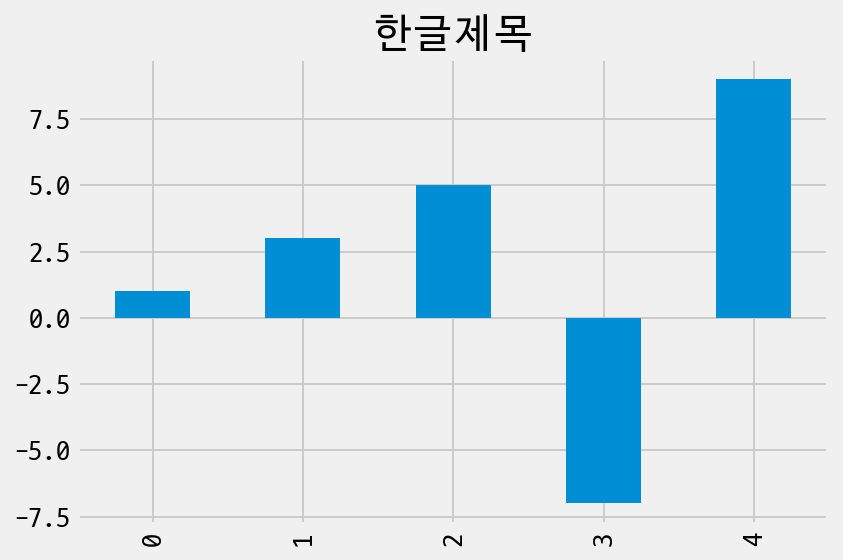

In [60]:
# 위 설정 테스트해서 확인해 보기

pd.Series([1, 3, 5, -7, 9]).plot.bar(title="한글제목")

## 시각화 선명하게 설정하기 - apple 만 가능

In [23]:
# retina 디스플레이가 지원되는 환경이라면 시각화의 폰트가 좀 더 선명해 보임

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

<hr style='border-color:green'>

# 확진일

In [34]:
# 확진일의 빈도수 보기 - 어느 날짜에 가장 많이 확진 되었는지 보기
# object 타입의 빈도수 세기 = value_counts()

df['확진일'].value_counts()

8.29.    167
8.27.    160
8.26.    157
8.18.    151
8.15.    146
        ... 
4.20.      1
4.30.      1
1.24.      1
2.6.       1
5.31.      1
Name: 확진일, Length: 231, dtype: int64

In [36]:
# '확진일' 컬럼의 데이터가 날짜 형태가 아니라 문자 형태임

df['확진일'].head()

0    10.08.
1    10.08.
2    10.08.
3    10.08.
4    10.08.
Name: 확진일, dtype: object

In [42]:
# 데이터 타입을 변경해서 날짜 형태로 변환
# 판다스의 to_datetime 을 사용해서 날짜 타입으로 변경가능
# 연도가 없기 때문에 2020년을 날짜에 추가하가 "-" 문자로 날짜 연결하기


# ① 이렇게 먼저 하고 나면 10-08- 로 나오게 됨
# df['확진일'].str.replace(".","-")

# ② to_datetime() 을 쓰게 되면 마지막 - 는 제거됨
df['확진일자']= pd.to_datetime("2020-"+df['확진일'].str.replace(".","-")) 
df[['확진일','확진일자']].head()

,확진일,확진일자
0,10.08.,2020-10-08
1,10.08.,2020-10-08
2,10.08.,2020-10-08
3,10.08.,2020-10-08
4,10.08.,2020-10-08


* 10.08.  => 2020-10-08 로 변경

In [47]:
# 월만 추출

df['월'] = df['확진일자'].dt.month
df.tail()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월
5480,5,9,1.31.,성북구,-,#5 접촉,퇴원,2020-01-31,1
5481,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원,2020-01-30,1
5482,3,6,1.30.,종로구,-,#3 접촉,퇴원,2020-01-30,1
5483,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원,2020-01-30,1
5484,1,2,1.24.,강서구,중국 우한시,해외 접촉,퇴원,2020-01-24,1


In [52]:
# 해당 연도의 몇번째 '주'인지 추출하기
# 동강에서 나온 df['확진일자'].dt.week 는 삭제되었다고 나옴

df['주'] = df['확진일자'].dt.isocalendar().week
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주
0,5485,24430,10.08.,관악구,-,감염경로 조사중,NaN,2020-10-08,10,41
1,5484,24458,10.08.,기타,-,감염경로 조사중,NaN,2020-10-08,10,41
2,5483,24471,10.08.,기타,-,감염경로 조사중,NaN,2020-10-08,10,41
3,5482,24474,10.08.,광진구,-,영등포구 방문판매업체 관련,NaN,2020-10-08,10,41
4,5481,24442,10.08.,기타,인도네시아,해외 접촉 추정,NaN,2020-10-08,10,41


<hr style='border-color:green'>

## 선 그래프 그리기

<AxesSubplot:>

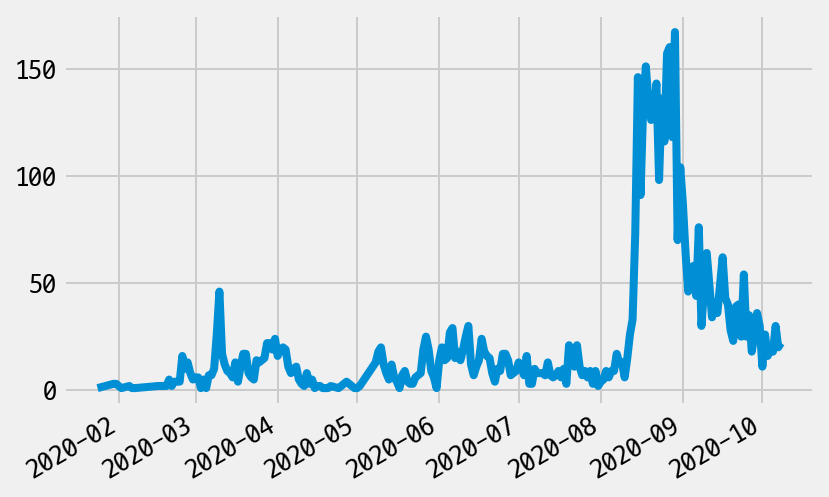

In [61]:
# 확진일자로 그래프 그리기

df['확진일자'].value_counts().plot()

<AxesSubplot:>

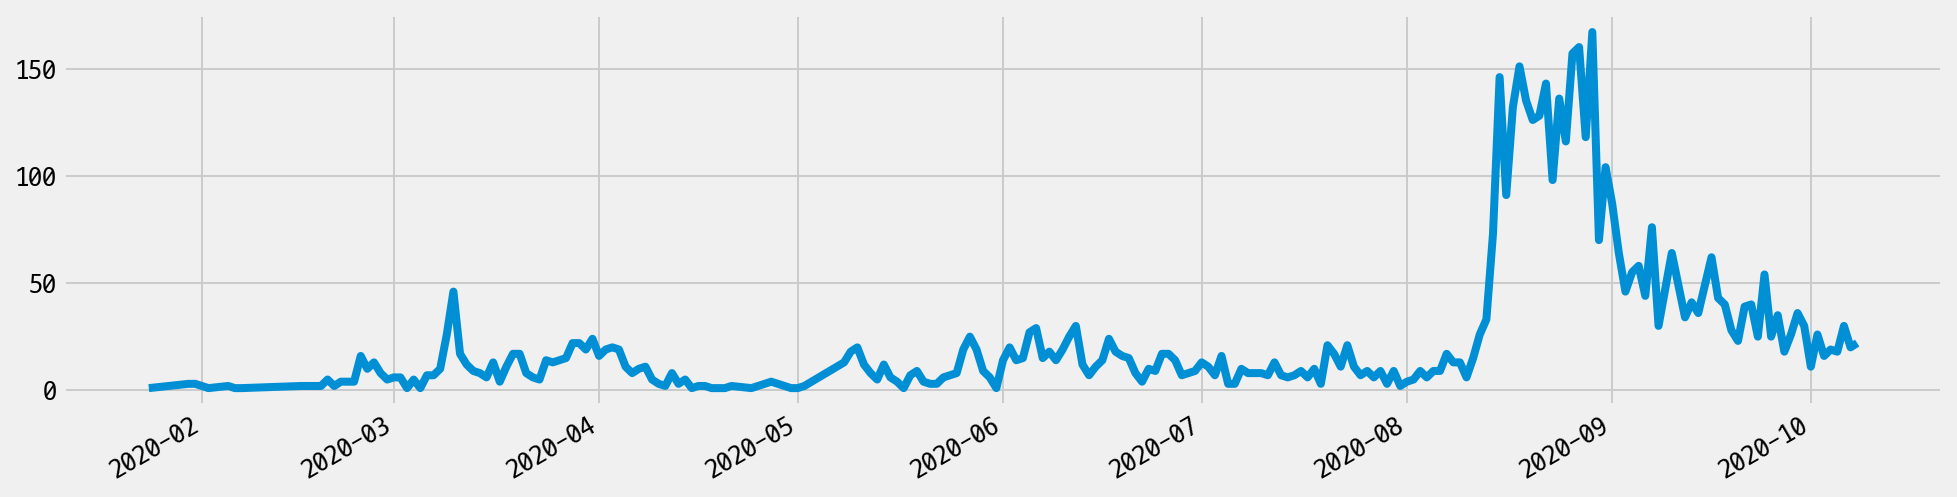

In [64]:
# 그래프 사이즈 변경

df['확진일자'].value_counts().plot(figsize=(15,4))

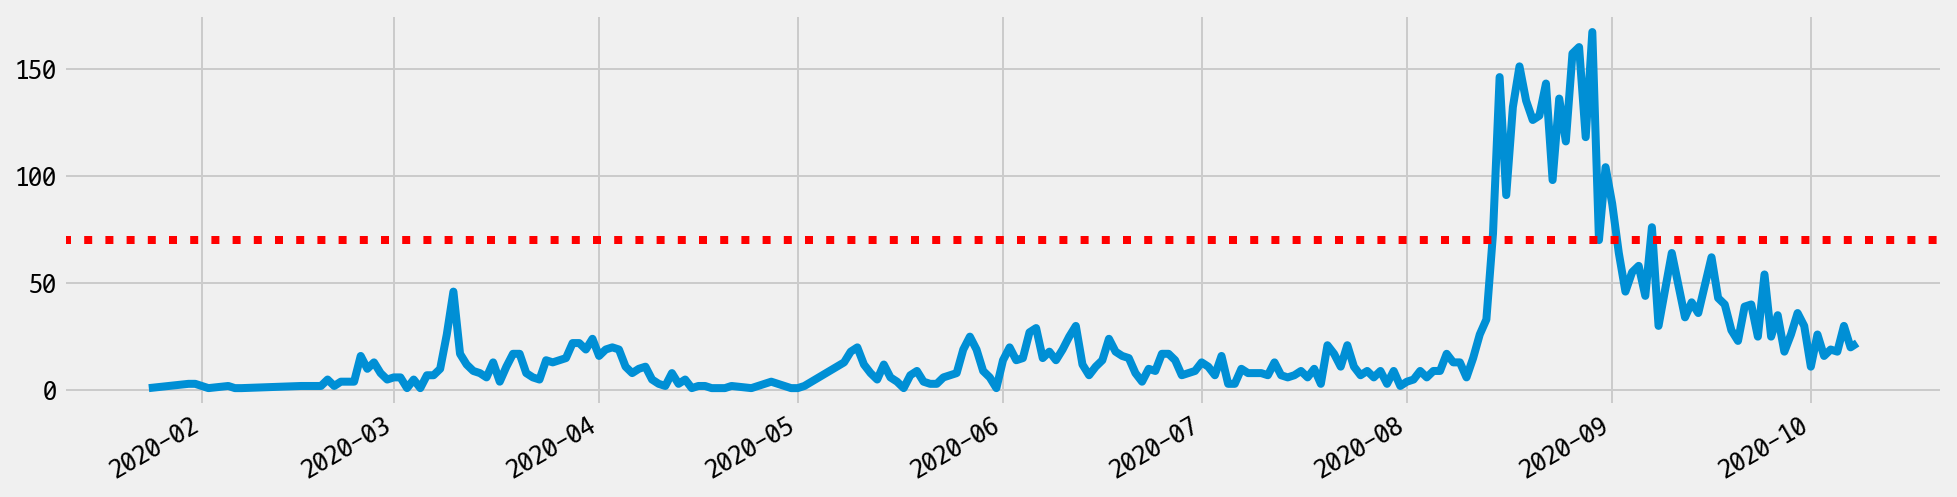

In [69]:
# 100 이라는 숫자에 가로 선 그리기

df['확진일자'].value_counts().plot(figsize=(15,4))
plt.axhline(70, color="red", linestyle=":")  # linesytle="--"

* [참고] 월 로 그리기 - 위의 방식으로 그리게 되면 이상하게 나오기 때문에 sort_index() 필요

<AxesSubplot:>

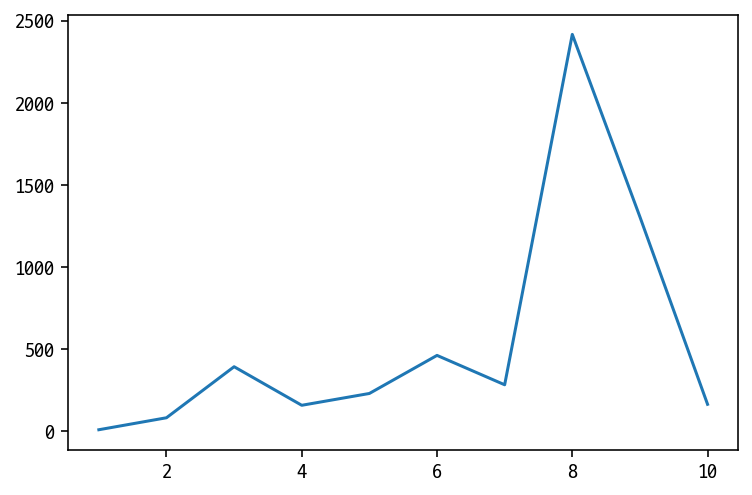

In [57]:
# 월로 그래프 그리기


# df['월'].value_counts().plot()   # 이상하게 나옴

df['월'].value_counts().sort_index().plot()

## 선 그래프에 값 표시하기

<AxesSubplot:>

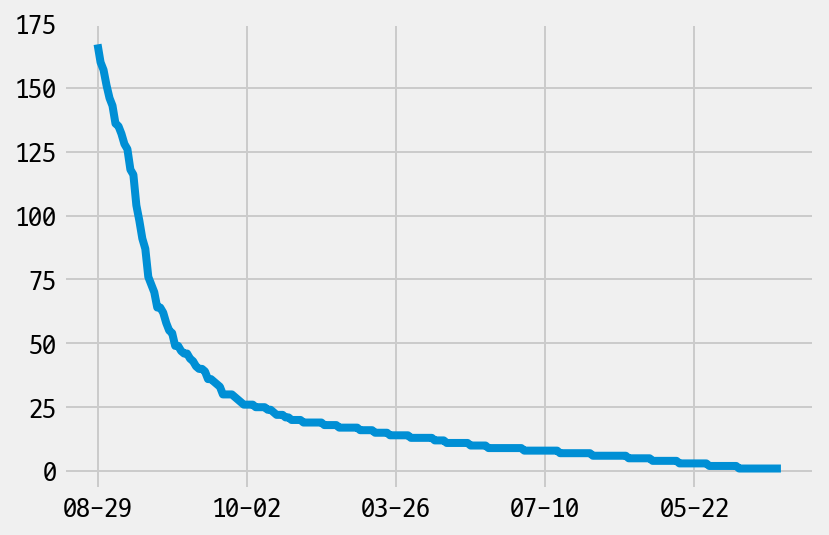

In [76]:
# 일자별 확진자수를 선 그래프로 그리기
# 연도는 모두 2020년이기 때문에 월일만 표기되도록 슬라이싱을 이용해 "월일" 컬럼 만들기

# str로 변경해야 slice 가 가능하기 때문에
df["월일"] = df['확진일자'].astype(str).map(lambda x: x[-5:])
df["월일"].value_counts().plot()   # 현재 타입이 str 이기 때문에 value_counts()를 한 후 차트를 그리면 값이 많은 순서로 그려지게 됨

<AxesSubplot:>

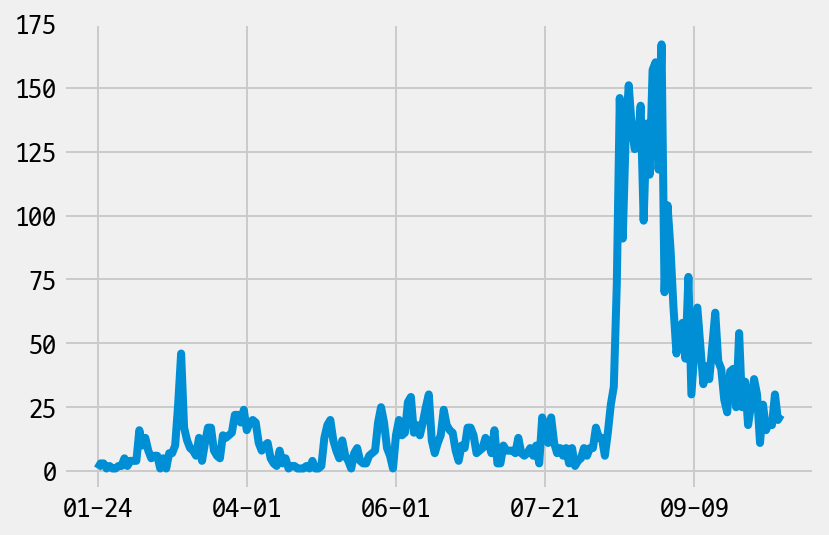

In [78]:
# 날짜별로 그리기 위해 다시 한번 sort_index()를 하고 plot() 하기

df["월일"].value_counts().sort_index().plot()

In [79]:
# 월일 값에 따른 확진자 수를 구한 값을 day_count 라는 변수에 담아 그래프에 숫자를 표시할 때 사용함

day_count = df["월일"].value_counts().sort_index()
day_count

01-24     1
01-30     3
01-31     3
02-02     1
02-05     2
         ..
10-04    19
10-05    18
10-06    30
10-07    20
10-08    22
Name: 월일, Length: 230, dtype: int64

<AxesSubplot:>

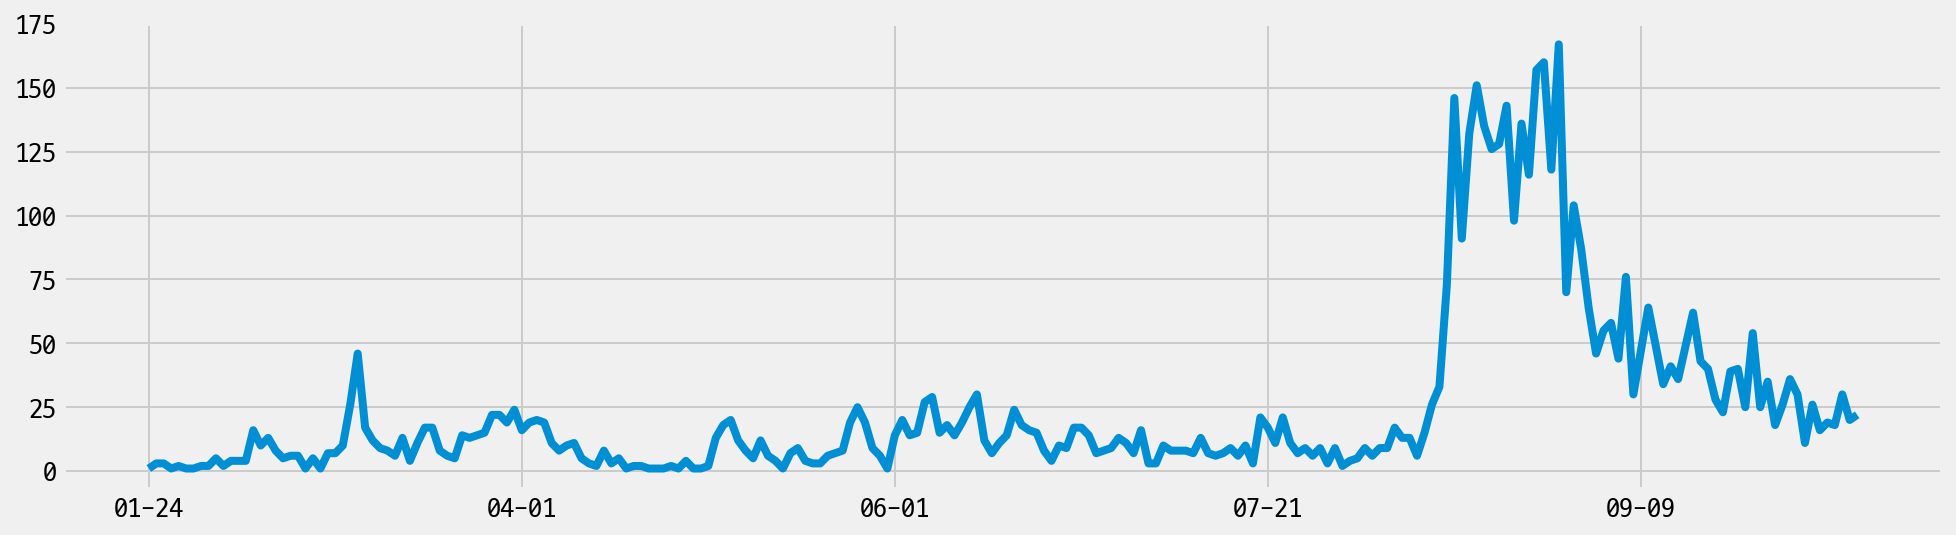

In [81]:
day_count.plot(figsize=(15,4))

In [83]:
# 각 날짜별 확진자 수 확인하기

for i in range(len(day_count)):
    print(day_count.iloc[i])

1
3
3
1
2
1
1
2
2
5
2
4
4
4
16
10
13
8
5
6
6
1
5
1
7
7
10
26
46
17
12
9
8
6
13
4
11
17
17
8
6
5
14
13
14
15
22
22
19
24
16
19
20
19
11
8
10
11
5
3
2
8
3
5
1
2
2
1
1
1
2
1
4
1
1
2
13
18
20
12
8
5
12
6
4
1
7
9
4
3
3
6
7
8
19
25
19
9
6
1
14
20
14
15
27
29
15
18
14
19
25
30
12
7
11
14
24
18
16
15
8
4
10
9
17
17
14
7
8
9
13
11
7
16
3
3
10
8
8
8
7
13
7
6
7
9
6
10
3
21
17
11
21
11
7
9
6
9
3
9
2
4
5
9
6
9
9
17
13
13
6
15
26
33
73
146
91
132
151
135
126
128
143
98
136
116
157
160
118
167
70
104
87
64
46
55
58
44
76
30
47
64
49
34
41
36
49
62
43
40
28
23
39
40
25
54
25
35
18
26
36
30
11
26
16
19
18
30
20
22


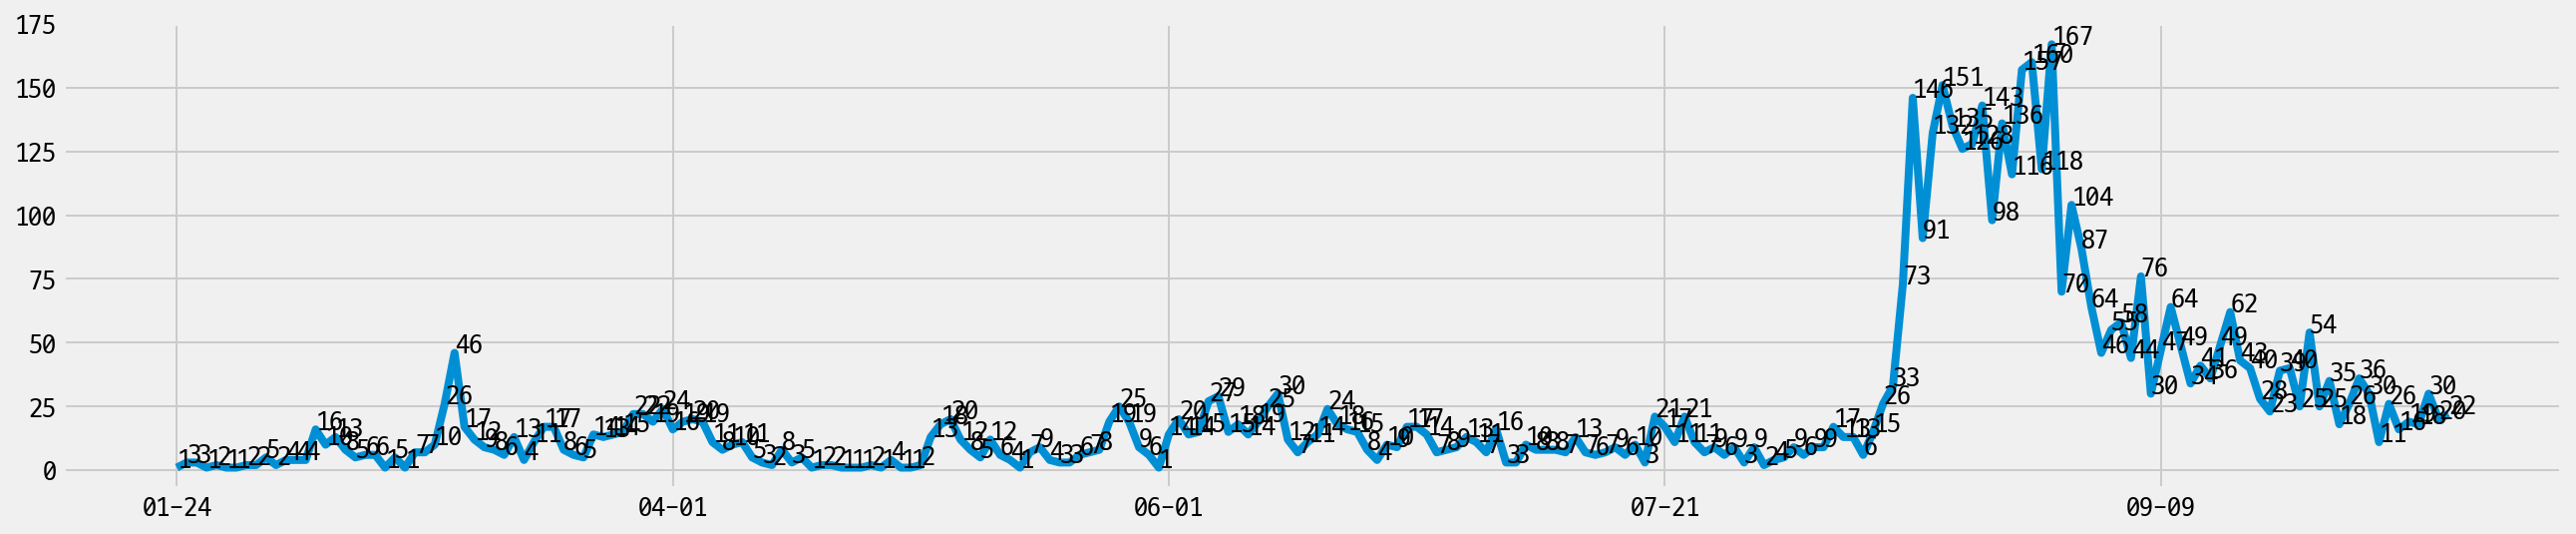

In [85]:
# 그래프에 값을 써주기 위한 준비

g = day_count.plot(figsize=(20,4))
for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    g.text(x=i, y=case_count, s=case_count)  # x : index, y=

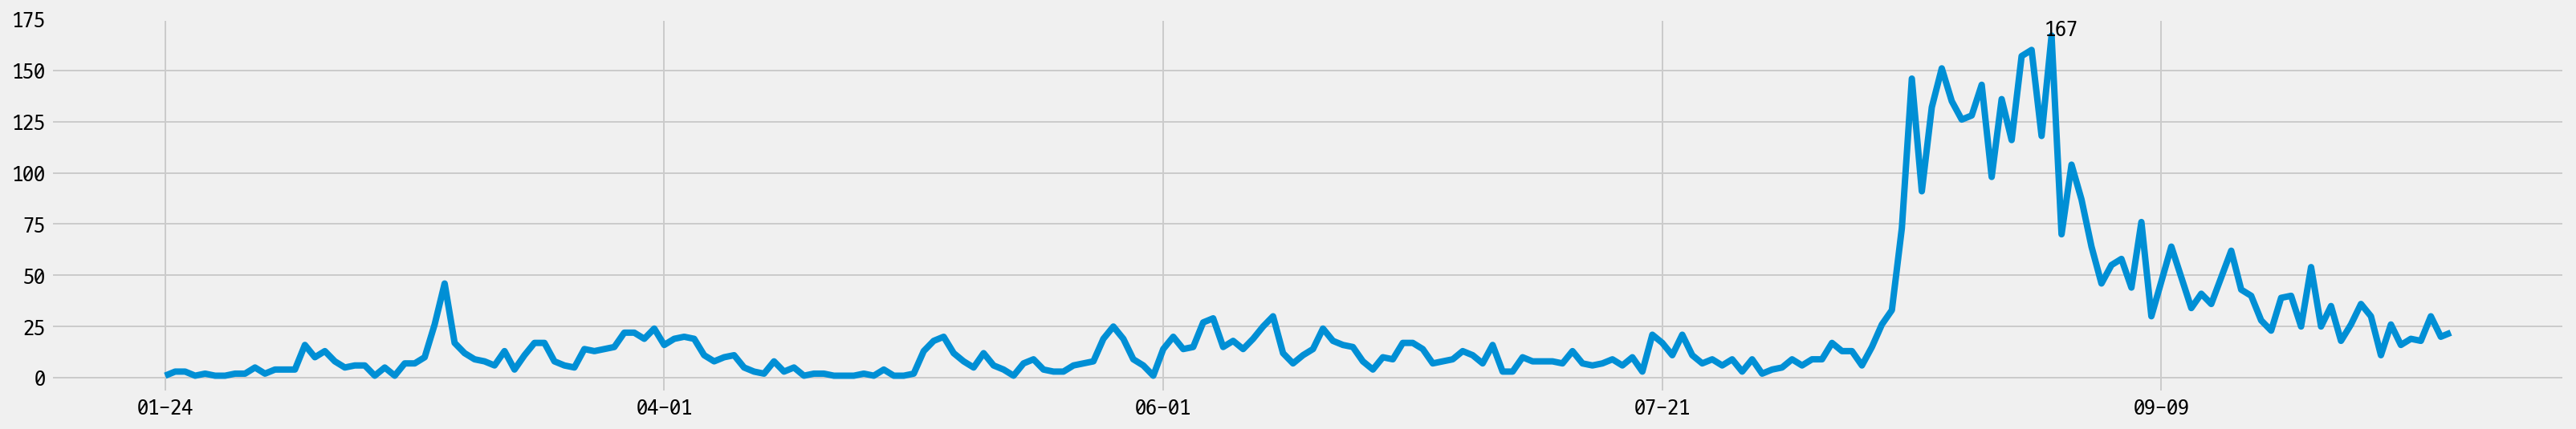

In [94]:
# 위 형태는 매일날짜별 확진자 수가 나오기 때문에 겹치기도 하고 잘 안보임

g = day_count.plot(figsize=(25,4))
for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    if case_count > 160:
        g.text(x=i-0.7, y=case_count, s=case_count)  # x : 어느 위치, y=

##  확진자가 가장 많이 나온 날

In [97]:
# describe 를 통해 일자별 확진자수를 요약하기

day_count

day_count.describe()

count    230.000000
mean      23.847826
std       33.708724
min        1.000000
25%        6.000000
50%       12.000000
75%       24.000000
max      167.000000
Name: 월일, dtype: float64

```
count : 확진자수가 나온 일 수는 230 일
mean : 평균적으로 확진자 수는 23
50% : 중앙값은 12명(mean 은 많이 나오는 날도 있었기 때문에 좀 더 높은 것)

```

In [101]:
# 확진자가 가장 많았던 날 찾기

#  day_count == day_count.max() 일치하는 행은 true 로 돌려주기 때문에 그걸 이용

day_count[day_count == day_count.max()]

08-29    167
Name: 월일, dtype: int64

In [103]:
# 확진자가 가장 많았던 날의 발생이력 찾기 = 성북구 사랑제일교회 관련

df[df["월일"] == "08-29"]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
1572,3913,20100,8.29.,관악구,-,타시도 확진자 접촉,퇴원,2020-08-29,8,35,08-29
1607,3878,19716,8.29.,동작구,-,성북구 사랑제일교회 관련,퇴원,2020-08-29,8,35,08-29
1634,3851,19830,8.29.,구로구,-,영등포구 권능교회,퇴원,2020-08-29,8,35,08-29
1635,3850,19849,8.29.,노원구,-,노원구 빛가온교회 관련,퇴원,2020-08-29,8,35,08-29
1636,3849,19898,8.29.,금천구,-,타시도 확진자 접촉,퇴원,2020-08-29,8,35,08-29
...,...,...,...,...,...,...,...,...,...,...,...
1822,3663,19451,8.29.,강남구,-,기타 확진자 접촉,퇴원,2020-08-29,8,35,08-29
1823,3662,19462,8.29.,동대문구,-,동대문구 sk탁구클럽,퇴원,2020-08-29,8,35,08-29
1824,3661,19416,8.29.,강북구,-,기타 확진자 접촉,퇴원,2020-08-29,8,35,08-29
1825,3660,19434,8.29.,강북구,-,기타 확진자 접촉,퇴원,2020-08-29,8,35,08-29


## 막대 그래프 그리기

<AxesSubplot:>

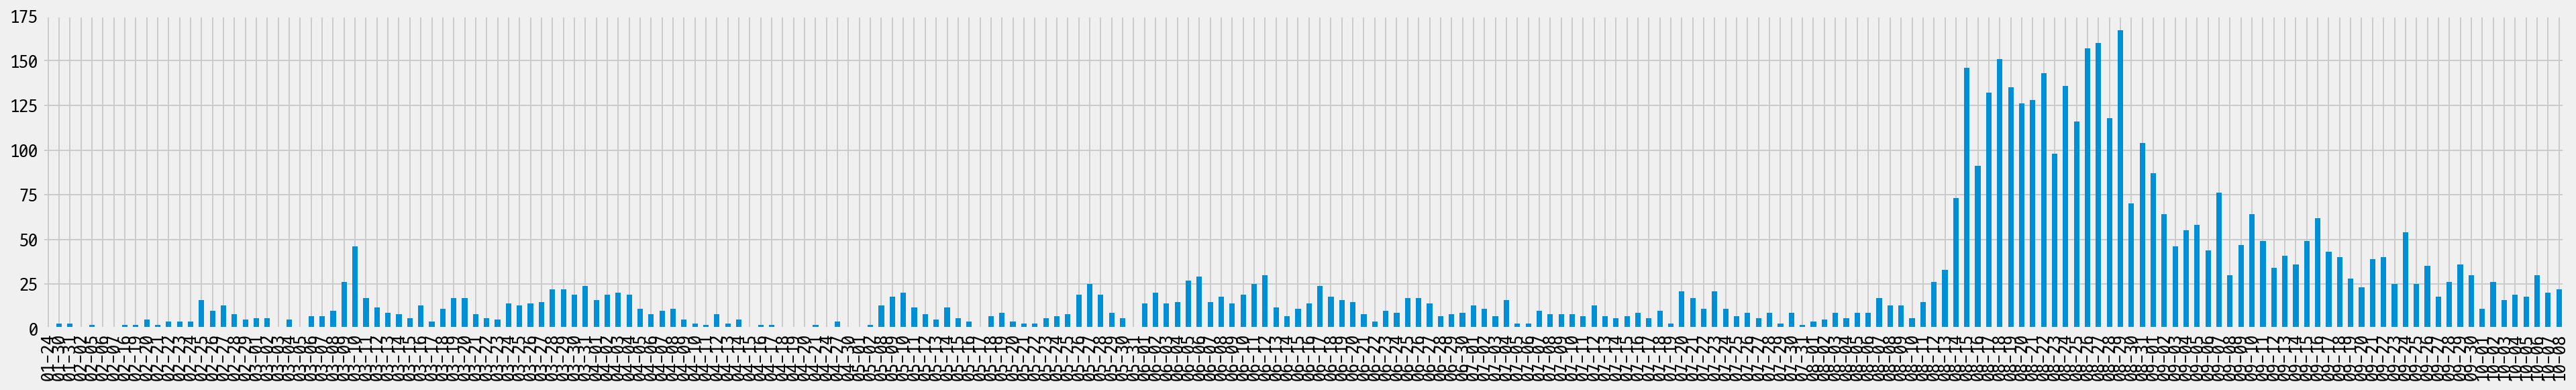

In [108]:
# 선 그래프로 그렸던 그래프를 막대 그래프로 그리기 - 데이터가 많기 때문에 잘 안보임

day_count.plot.bar(figsize=(30,4))

## 최근 데이터만 슬라이싱으로 확인

<AxesSubplot:>

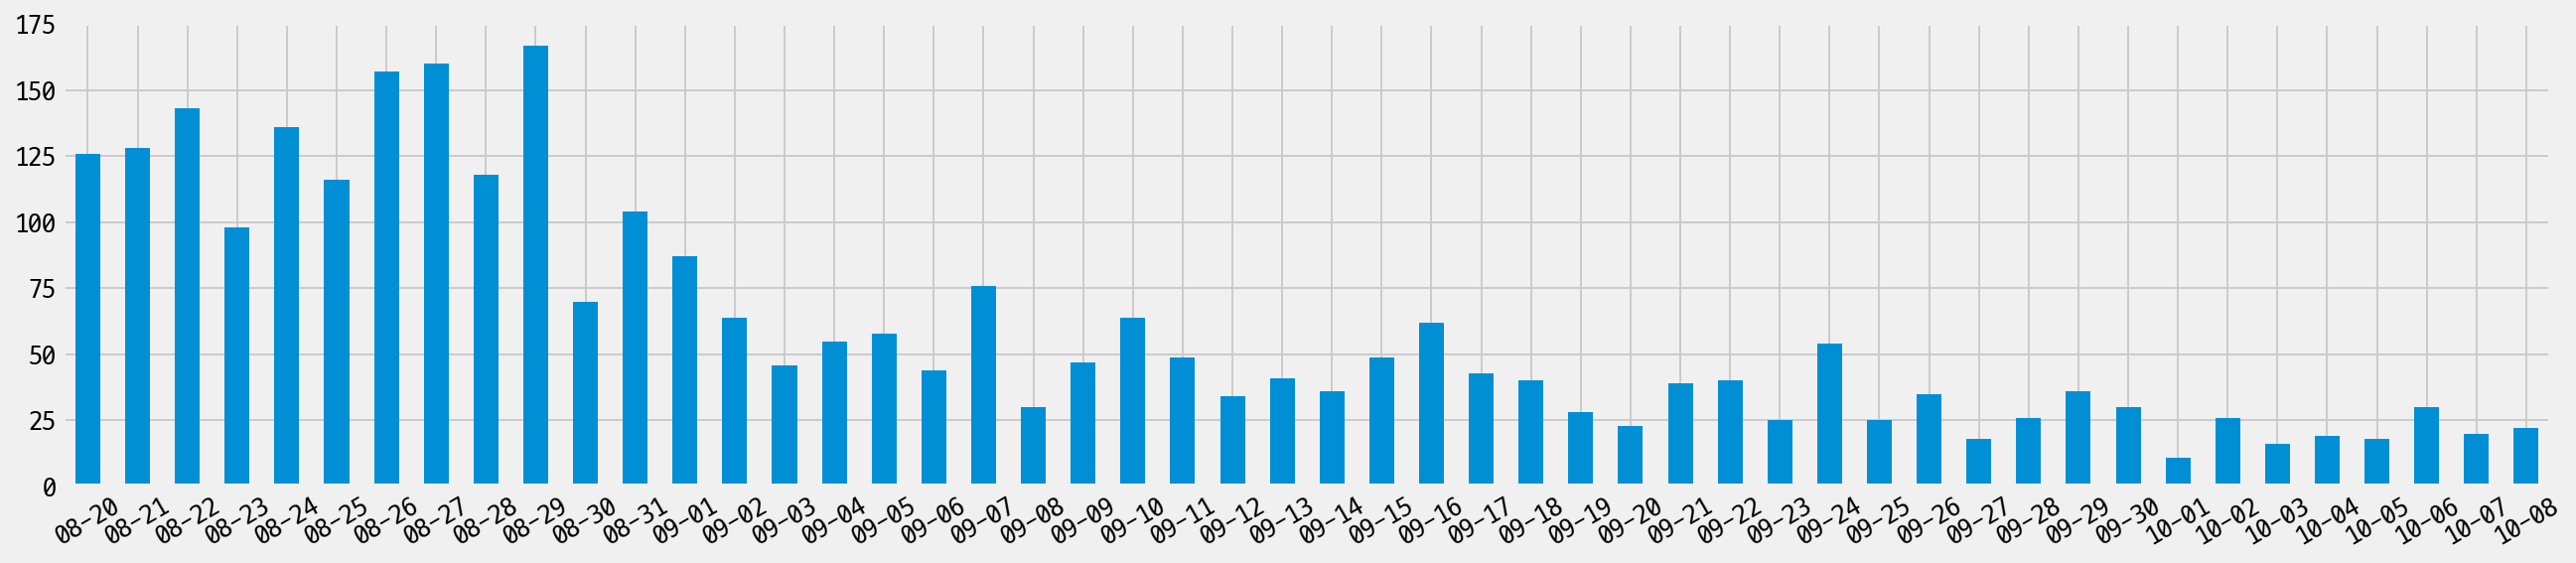

In [112]:
# 슬라이싱을 통해 최근 데이터만 그리기

day_count[-50:].plot.bar(figsize=(20,4),rot=30)

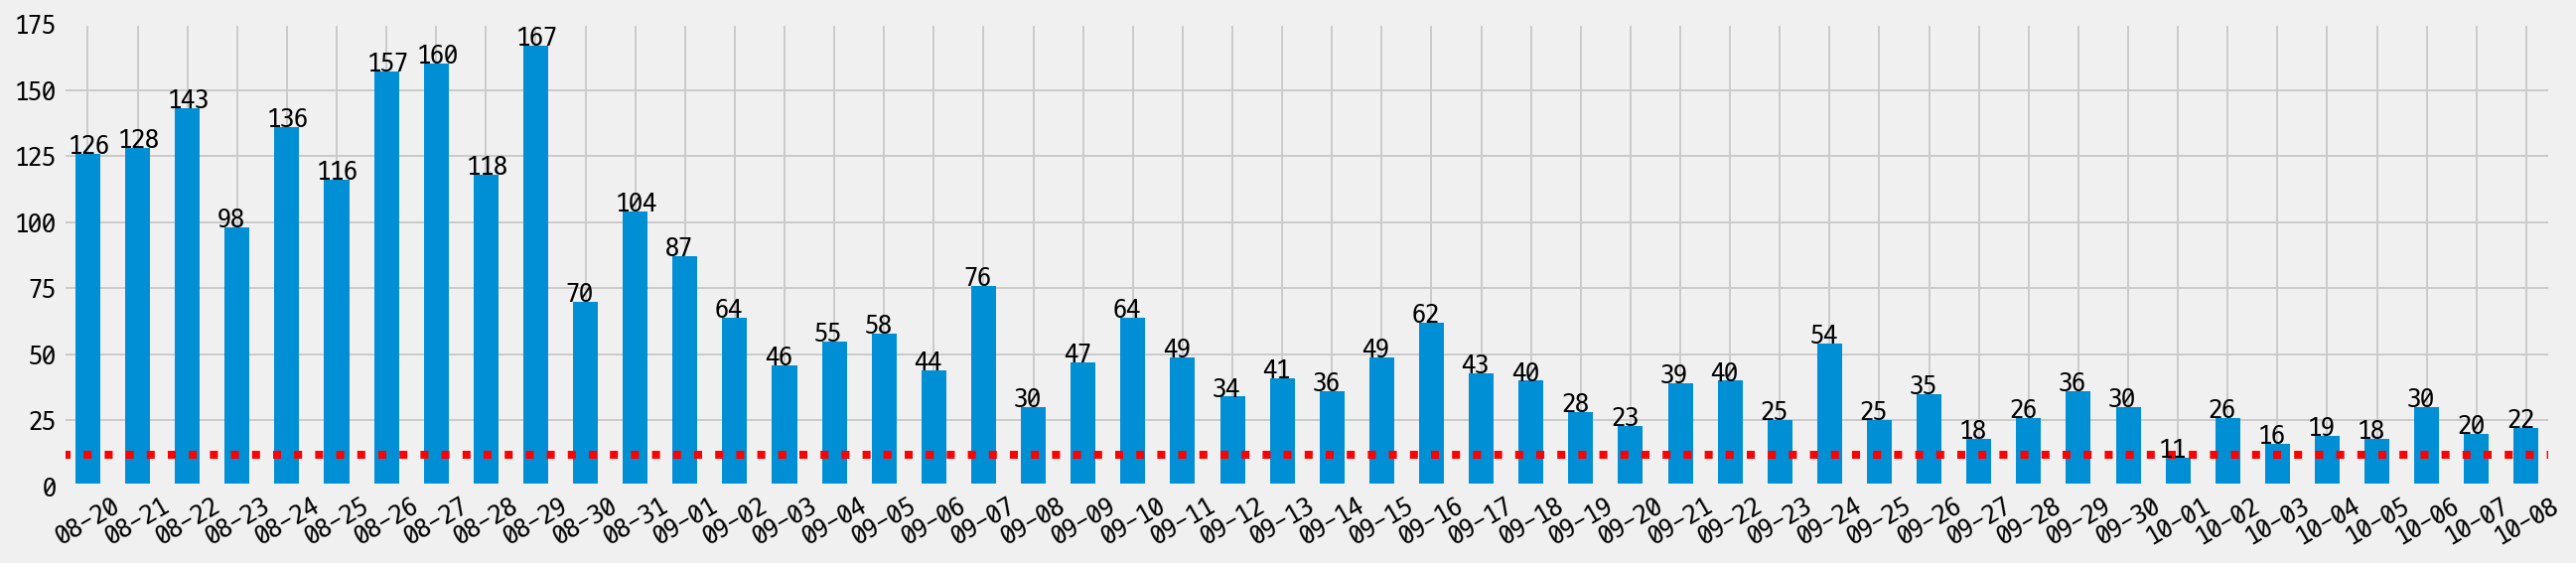

In [119]:
# 슬라이싱을 통해 최근 데이터만 그리기
# 숫자 표시하기

g = day_count[-50:].plot.bar(figsize=(20, 4), rot=30)

# 중위값에 선 긋기
g.axhline(day_count.median(), linestyle=":", color="red")


for i in range(50):
    case_count = day_count[-50:].iloc[i]
    g.text(x=i-0.4, y=case_count, s=case_count)

## 월별 확진자 수 그리기

In [ ]:
# 월별 확진자수에 대한 빈도수를 구해서 시각화 하기

## 주 단위 확진자 수 그리기

In [ ]:
# 주 별로 빈도수 구하기

In [ ]:
# 주단위 빈도수 막대 그래프 그리기

## 월-주 함께 그리기

In [ ]:
# groupby 를 통해 "월","주" 로 그룹화 하여 빈도수 계산하기

In [120]:
# 월-주를 함께 그래프에 표현하기

# 모든 날짜를 행에 만들어 주기

## merge를 통해 전체 확진자 수 

#  누적 확진자 수 구하기

## 데이터 프레임으로 그리기

## 시리즈로 그리기

## 확진수만 따로 그리기

## 누적 확진만 따로 그리기

## 로그 스케일

## 확진월과 요일 구하기

# 요일별 확진 수

# 거주지별 확진자

# 접촉력

## 이태원 클럽 관련

## 8.15 집회

## 감염경로 불명

# 가장 많은 전파가 일어난 번호

# 조치사항

# 퇴원, 사망여부

# 병원

## iloc로 일부 데이터만 보기

## loc로 일부 데이터만 보기

## pandas style 적용하기

# 여행력

## 여행력이 있는 데이터만 보기

## 텍스트 데이터 다루기

## 전체 확진자 수와 해외 유입 확진자 수 구하기

## merge를 통해 전체 확진자 수 구하기

## 해외 유입 확진자 중 퇴원

## 월별 해외 확진자 수

## 구와 월별 해외 확진자 수

### groubby로 빈도수 구하기

### crosstab 으로 빈도수 구하기

### crosstab 으로 빈도수 구하기

## 해외 유입이 많은 지역

## 구별 해외유입 국가 분석